CAT / DOG IMAGE CLASSIFIER USING A CONVOLUTIONAL NEURAL NETWORK

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'z:\Program Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.1.21
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.16.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.8.0
idna                         3.4
ipykernel                    6.21.2
ipython                      8.10.0
jedi                         0.18.2
jup

You should consider upgrading via the 'Z:\Program Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data','dog')


'data\\dog'

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\cat\907825a8-9910-44a8-a768-9464861246d5.zip
Image not in ext list data\cat\black-cat-back.jpg
Image not in ext list data\cat\cat-toes-paw-number-paws-tiger-tabby.jpg
Image not in ext list data\cat\cs-pet-health-cat-exercises-1440x810.jpg
Image not in ext list data\cat\Himalayan-chocolate-point.jpg
Image not in ext list data\dog\1024px-Cute_dog.jpg
Image not in ext list data\dog\1e74feb7acc056865f4e9551587b908e224ed541-2797x1199.jpg
Image not in ext list data\dog\2022-05-06_10_Easy_Pieces_to_Liven_Up_Your_Dog-s_Dinner_AdobeStock_328836752.jpg
Image not in ext list data\dog\640px-YellowLabradorLooking.jpg
Image not in ext list data\dog\dog-breed-is-not-an-accurate-way-to-predict-behavior-361072-960x540.jpg
Image not in ext list data\dog\German-Shepherd-dog-Alsatian.jpg
Image not in ext list data\dog\German-shepherd.jpg
Image not in ext list data\dog\Haiti20head20tilt.jpg
Image not in ext list data\dog\happy-puppy-dog-smiling-on-260nw-1799966587.jpg


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 287 files belonging to 2 classes.


In [11]:

data_iterator = data.as_numpy_iterator()

In [12]:

batch = data_iterator.next()

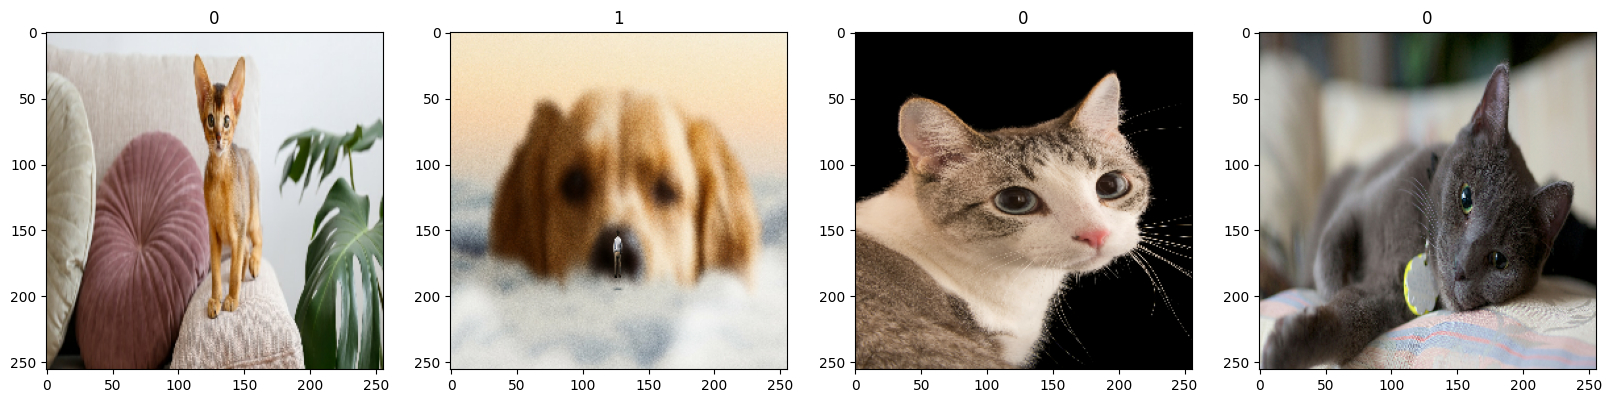

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:

data.as_numpy_iterator().next()

(array([[[[0.8784314 , 0.8901961 , 0.14117648],
          [0.8688036 , 0.8741498 , 0.16043198],
          [0.8858073 , 0.87879133, 0.23579963],
          ...,
          [0.19050245, 0.14700522, 0.08307292],
          [0.1707644 , 0.13547029, 0.06880362],
          [0.18039216, 0.14509805, 0.07843138]],
 
         [[0.88161767, 0.8933824 , 0.14436275],
          [0.88502747, 0.8903737 , 0.17665584],
          [0.89381653, 0.8890223 , 0.23936552],
          ...,
          [0.21540767, 0.17191042, 0.10797814],
          [0.2008971 , 0.16560298, 0.09893631],
          [0.1740196 , 0.13872549, 0.07205883]],
 
         [[0.9227941 , 0.9345588 , 0.18553922],
          [0.93362534, 0.9389715 , 0.22525372],
          [0.92269933, 0.91841775, 0.2672229 ],
          ...,
          [0.22197121, 0.17847398, 0.11454169],
          [0.20907772, 0.1737836 , 0.10711694],
          [0.16715686, 0.13186274, 0.06519608]],
 
         ...,
 
         [[0.1742647 , 0.20955883, 0.00539216],
          [0.19672

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 12s 1s/step - loss: 1.0032 - accuracy: 0.5312 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 11s 1s/step - loss: 0.6846 - accuracy: 0.5573 - val_loss: 0.6435 - val_accuracy: 0.6406
Epoch 3/20
6/6 [==============================] - 10s 1s/step - loss: 0.6475 - accuracy: 0.5885 - val_loss: 0.5981 - val_accuracy: 0.5781
Epoch 4/20
6/6 [==============================] - 10s 1s/step - loss: 0.5715 - accuracy: 0.6510 - val_loss: 0.5957 - val_accuracy: 0.6094
Epoch 5/20
6/6 [==============================] - 10s 1s/step - loss: 0.5047 - accuracy: 0.7812 - val_loss: 0.4344 - val_accuracy: 0.7969
Epoch 6/20
6/6 [==============================] - 10s 1s/step - loss: 0.4584 - accuracy: 0.7917 - val_loss: 0.3910 - val_accuracy: 0.8750
Epoch 7/20
6/6 [==============================] - 11s 1s/step - loss: 0.3870 - accuracy: 0.8385 - val_loss: 0.3313 - val_accuracy: 0.8750
Epoch 8/20
6/6 [==================

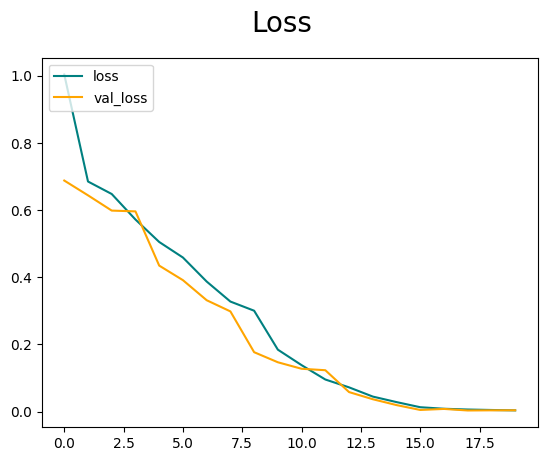

In [29]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

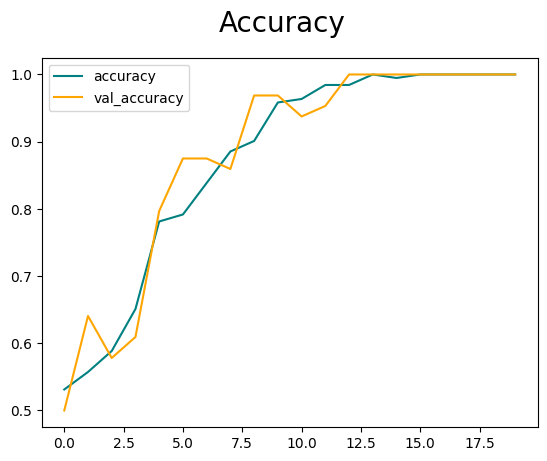

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 266ms/step


In [48]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [49]:
import cv2

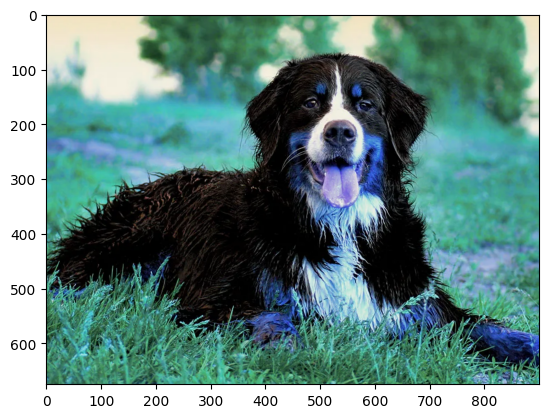

In [53]:
img = cv2.imread('dogtest.jpg')
plt.imshow(img)
plt.show()

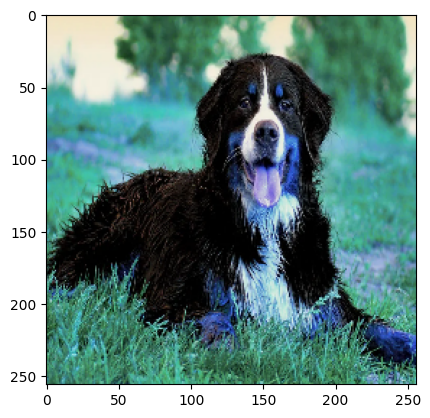

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [56]:
yhat

array([[0.99893135]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','imageclassifier.h5'))

In [61]:
new_model = load_model('models/imageclassifier.h5')

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 119ms/step


array([[0.99893135]], dtype=float32)